In [ ]:
import requests
response = requests.get('https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes')
html_content = response.text

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Assume HTML content is already available in `html_content`
soup = BeautifulSoup(html_content, 'html.parser')

# Locate the table
table = soup.find('table', class_='wikitable sortable')
if table is None:
    print("No table with class 'wikitable sortable' found!")
    exit()

# Extract table headers
headers = []
header_row = table.find('tr')
if header_row:
    for th in header_row.find_all('th'):
        headers.append(th.get_text(strip=True))

# Extract data rows
data = []
for row in table.find_all('tr')[1:]:
    cells = row.find_all('td')
    if not cells:
        continue

    # Extract cell values
    date = cells[0].get_text(strip=True)
    prison_name = cells[1].get_text(strip=True)
    country = cells[2].get_text(strip=True)
    succeeded = cells[3].get_text(strip=True)
    escapees = cells[4].get_text(separator='\n', strip=True)

    data.append([date, prison_name, country, succeeded, escapees])

# Create the DataFrame
df = pd.DataFrame(data, columns=["Date", "Prison Name", "Country", "Succeeded", "Escapee(s)"])

# Display the first few rows
print(df.head())

                Date                                  Prison Name  \
0    August 19, 1971                        Santa Martha Acatitla   
1   October 31, 1973                         Mountjoy Jail,Dublin   
2       May 24, 1978  United States Penitentiary, Marion,Illinois   
3  February 27, 1981         Fleury-Mérogis,Essonne,Ile de France   
4        May 7, 1981               Orsainville Prison,Quebec City   

         Country Succeeded                                         Escapee(s)  
0         Mexico       Yes  Joel David Kaplan\nCarlos Antonio Contreras Ca...  
1        Ireland       Yes            JB O'Hagan\nSeamus Twomey\nKevin Mallon  
2  United States        No  Garrett Brock Trapnell\nMartin Joseph McNally\...  
3         France       Yes                      Gérard Dupré\nDaniel Beaumont  
4         Canada        No  Marina Paquet (hijacker)\nGiles Arseneault (pr...  


In [ ]:
# creating a new column to store the extracted year and decade from 'Date'
df["Year"] = df["Date"].apply(lambda x: int(str(x).split()[-1]) if x else None)
df["Decade"] = (df["Year"] // 10) * 10

print(df.head())

                Date                                  Prison Name  \
0    August 19, 1971                        Santa Martha Acatitla   
1   October 31, 1973                         Mountjoy Jail,Dublin   
2       May 24, 1978  United States Penitentiary, Marion,Illinois   
3  February 27, 1981         Fleury-Mérogis,Essonne,Ile de France   
4        May 7, 1981               Orsainville Prison,Quebec City   

         Country Succeeded                                         Escapee(s)  \
0         Mexico       Yes  Joel David Kaplan\nCarlos Antonio Contreras Ca...   
1        Ireland       Yes            JB O'Hagan\nSeamus Twomey\nKevin Mallon   
2  United States        No  Garrett Brock Trapnell\nMartin Joseph McNally\...   
3         France       Yes                      Gérard Dupré\nDaniel Beaumont   
4         Canada        No  Marina Paquet (hijacker)\nGiles Arseneault (pr...   

   Year  Decade  
0  1971    1970  
1  1973    1970  
2  1978    1970  
3  1981    1980  
4  1981 

In [ ]:
# Analyzing helicopter prison escapes by year and decade
year_counts = df["Year"].value_counts().sort_index()
decade_counts = df["Decade"].value_counts().sort_index()

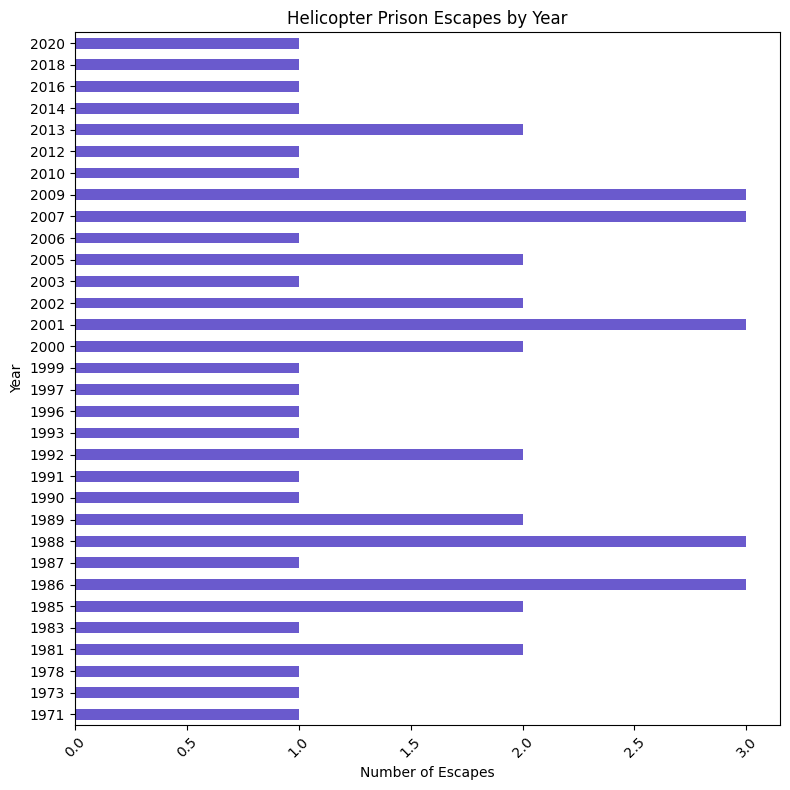

In [ ]:
import matplotlib.pyplot as plt

year_counts.plot(kind='barh', color='slateblue', figsize=(8, 8))
plt.ylabel("Year")
plt.xlabel("Number of Escapes")
plt.title("Helicopter Prison Escapes by Year")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

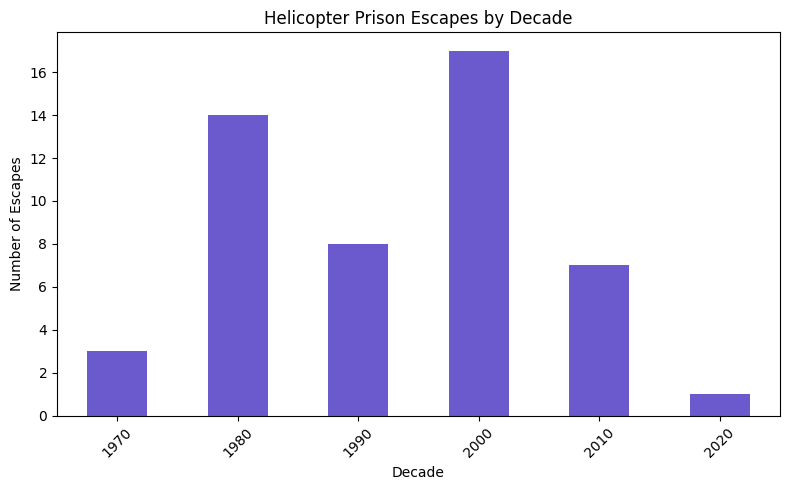

In [ ]:

decade_counts.plot(kind='bar', color='slateblue', figsize=(8, 5))
plt.xlabel("Decade")
plt.ylabel("Number of Escapes")
plt.title("Helicopter Prison Escapes by Decade")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

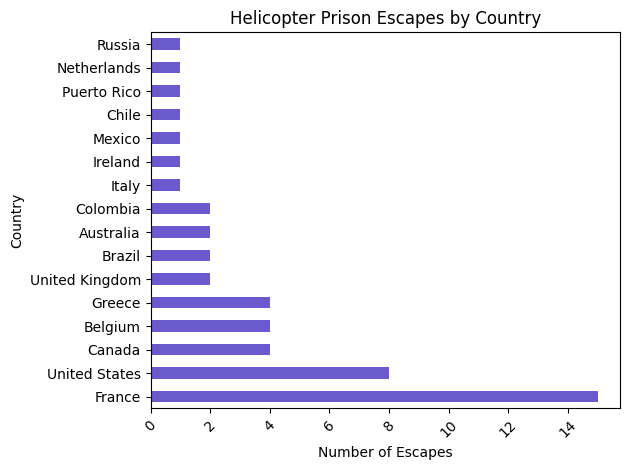

In [ ]:
# analyzing escapes by country
countries_frequency = df["Country"].value_counts()

countries_frequency.plot(kind='barh', color='slateblue')
plt.ylabel("Country")
plt.xlabel("Number of Escapes")
plt.title("Helicopter Prison Escapes by Country")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# analyzing success rates of helicopter crashes by country

df['Succeeded'] = df['Succeeded'].str.strip().str.lower()  # to lowercase, no spaces

# Total attempts per country
total_attempts = df.groupby('Country').size()

# Successful escapes per country
successful_escapes = df[df['Succeeded'] == 'yes'].groupby('Country').size()

# Combine into a DataFrame
success_rate_df = pd.DataFrame({
    'Total Attempts': total_attempts,
    'Successful Escapes': successful_escapes
})

# Fill NaN (countries with 0 successes) with 0
success_rate_df['Successful Escapes'] = success_rate_df['Successful Escapes'].fillna(0)

# Add success rate column
success_rate_df['Success Rate (%)'] = (success_rate_df['Successful Escapes'] / success_rate_df['Total Attempts']) * 100

print(success_rate_df.sort_values(by='Success Rate (%)', ascending=False))


                Total Attempts  Successful Escapes  Success Rate (%)
Country                                                             
Brazil                       2                 2.0        100.000000
Chile                        1                 1.0        100.000000
Colombia                     2                 2.0        100.000000
Russia                       1                 1.0        100.000000
Puerto Rico                  1                 1.0        100.000000
Mexico                       1                 1.0        100.000000
Italy                        1                 1.0        100.000000
Ireland                      1                 1.0        100.000000
Canada                       4                 3.0         75.000000
United States                8                 6.0         75.000000
France                      15                11.0         73.333333
Belgium                      4                 2.0         50.000000
Greece                       4    

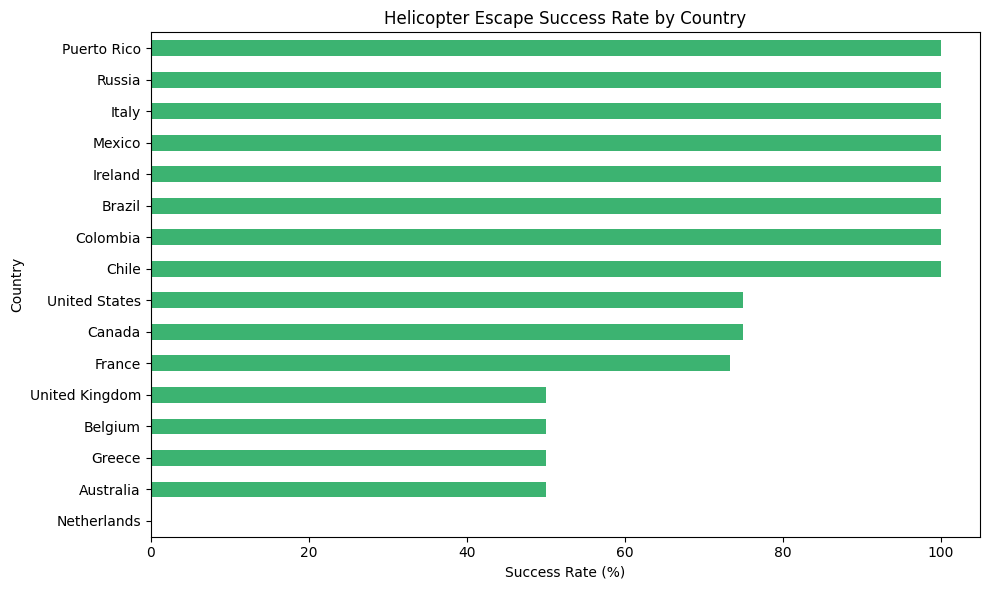

In [ ]:
import matplotlib.pyplot as plt

# Plot success rate
success_rate_df['Success Rate (%)'].sort_values().plot(kind='barh', figsize=(10, 6), color='mediumseagreen')
plt.xlabel("Success Rate (%)")
plt.title("Helicopter Escape Success Rate by Country")
plt.tight_layout()
plt.show()

In [ ]:
# Handle multiple escapees (split by comma or line breaks)
df["Num Escapees"] = df["Escapee(s)"].apply(lambda x: len(str(x).replace('\n', ',').split(',')))

print(df.head())

                Date                                  Prison Name  \
0    August 19, 1971                        Santa Martha Acatitla   
1   October 31, 1973                         Mountjoy Jail,Dublin   
2       May 24, 1978  United States Penitentiary, Marion,Illinois   
3  February 27, 1981         Fleury-Mérogis,Essonne,Ile de France   
4        May 7, 1981               Orsainville Prison,Quebec City   

         Country Succeeded                                         Escapee(s)  \
0         Mexico       yes  Joel David Kaplan\nCarlos Antonio Contreras Ca...   
1        Ireland       yes            JB O'Hagan\nSeamus Twomey\nKevin Mallon   
2  United States        no  Garrett Brock Trapnell\nMartin Joseph McNally\...   
3         France       yes                      Gérard Dupré\nDaniel Beaumont   
4         Canada        no  Marina Paquet (hijacker)\nGiles Arseneault (pr...   

   Year  Decade  Num Escapees  
0  1971    1970             2  
1  1973    1970             3  
2 

In [ ]:
df['Succeeded'] = df['Succeeded'].map({'yes': 1, 'no': 0})
grouped = df.groupby("Num Escapees")["Succeeded"].agg(['count', 'sum'])
grouped.columns = ["Total Attempts", "Successful Escapes"]
grouped["Success Rate (%)"] = (grouped["Successful Escapes"] / grouped["Total Attempts"]) * 100

print(grouped)

              Total Attempts  Successful Escapes  Success Rate (%)
Num Escapees                                                      
1                         25                  14         56.000000
2                         14                  12         85.714286
3                         10                   9         90.000000
5                          1                   1        100.000000


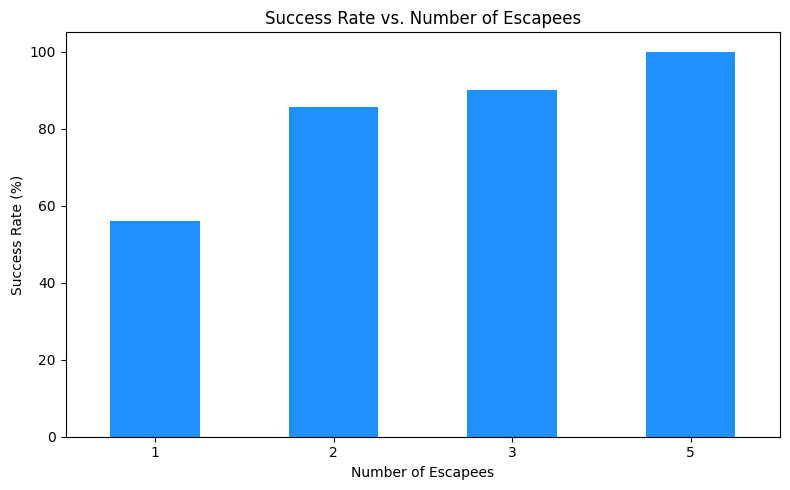

In [ ]:
import matplotlib.pyplot as plt

grouped["Success Rate (%)"].plot(kind="bar", color="dodgerblue", figsize=(8, 5))
plt.title("Success Rate vs. Number of Escapees")
plt.xlabel("Number of Escapees")
plt.ylabel("Success Rate (%)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Patterns in repeat escapees

In [ ]:
# Expand rows: one row per escapee
df['Escapee(s)'] = df['Escapee(s)'].str.replace('\n', ',')  # if line breaks are used
df['Escapee(s)'] = df['Escapee(s)'].str.replace('—', '')  # Handle NaN
df['Escapee(s)'] = df['Escapee(s)'].fillna('')  # Handle NaN

df_expanded = df.assign(Escapee=df['Escapee(s)'].str.split(',')).explode('Escapee(s)')

# Clean whitespace
df_expanded['Escapee(s)'] = df_expanded['Escapee(s)'].str.strip()
df_expanded = df_expanded[df_expanded['Escapee(s)'] != '']

print(df_expanded.head())


                Date                                  Prison Name  \
0    August 19, 1971                        Santa Martha Acatitla   
1   October 31, 1973                         Mountjoy Jail,Dublin   
2       May 24, 1978  United States Penitentiary, Marion,Illinois   
3  February 27, 1981         Fleury-Mérogis,Essonne,Ile de France   
4        May 7, 1981               Orsainville Prison,Quebec City   

         Country  Succeeded  \
0         Mexico          1   
1        Ireland          1   
2  United States          0   
3         France          1   
4         Canada          0   

                                          Escapee(s)  Year  Decade  \
0  Joel David Kaplan,Carlos Antonio Contreras Castro  1971    1970   
1              JB O'Hagan,Seamus Twomey,Kevin Mallon  1973    1970   
2  Garrett Brock Trapnell,Martin Joseph McNally,J...  1978    1970   
3                       Gérard Dupré,Daniel Beaumont  1981    1980   
4  Marina Paquet (hijacker),Giles Arseneault (pr

In [ ]:
escapee_counts = df_expanded['Escapee(s)'].value_counts()
repeat_escapees = escapee_counts[escapee_counts > 1]
print(repeat_escapees)

Escapee(s)
Pascal Payet      2
Michel Vaujour    2
Name: count, dtype: int64


In [ ]:
df_repeat = df_expanded[df_expanded['Escapee(s)'].isin(repeat_escapees.index)]
print(df_repeat)

                Date                   Prison Name Country  Succeeded  \
8       May 26, 1986            Prison de la Santé  France          1   
21     June 17, 1993  TouraineCentral Prison,Tours  France          0   
27  January 19, 2001                 Luynes prison  France          1   
37     July 15, 2007                  Grasseprison  France          1   

        Escapee(s)  Year  Decade  Num Escapees           Escapee  
8   Michel Vaujour  1986    1980             1  [Michel Vaujour]  
21  Michel Vaujour  1993    1990             1  [Michel Vaujour]  
27    Pascal Payet  2001    2000             1    [Pascal Payet]  
37    Pascal Payet  2007    2000             1    [Pascal Payet]  


In [ ]:
# Escape counts by name
print(df_repeat.groupby('Escapee(s)').size())

Escapee(s)
Michel Vaujour    2
Pascal Payet      2
dtype: int64


In [ ]:
# Success pattern per repeat escapee
print(df_repeat.groupby(['Escapee(s)', 'Succeeded']).size())

Escapee(s)      Succeeded
Michel Vaujour  0            1
                1            1
Pascal Payet    1            2
dtype: int64


In [ ]:
# By country
print(df_repeat.groupby(['Escapee(s)', 'Country']).size())

Escapee(s)      Country
Michel Vaujour  France     2
Pascal Payet    France     2
dtype: int64


In [ ]:
# By decade or year
print(df_repeat.groupby(['Escapee(s)', 'Decade']).size())

Escapee(s)      Decade
Michel Vaujour  1980      1
                1990      1
Pascal Payet    2000      2
dtype: int64


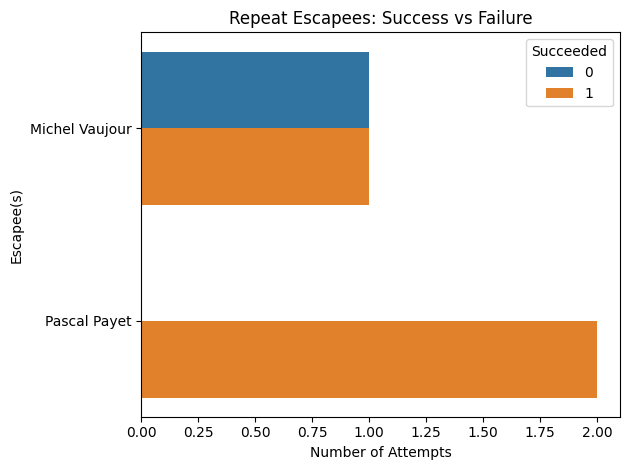

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df_repeat, y='Escapee(s)', hue='Succeeded')
plt.title('Repeat Escapees: Success vs Failure')
plt.xlabel('Number of Attempts')
plt.tight_layout()
plt.show()


In [90]:
from google.colab import userdata
api_key = userdata.get('GOOGLE_API_KEY')


In [ ]:
import google.generativeai as genai
from tenacity import retry, wait_random_exponential, stop_after_attempt
from functools import lru_cache

@lru_cache(maxsize=128)
@retry(wait=wait_random_exponential(min=1, max=60), stop=stop_after_attempt(6))
def gpt_infer_security(prison_name: str) -> str:
    """
    Use Google's Generative AI (Gemini) to infer the security level of a prison.
    This function caches results and implements exponential backoff on errors.
    """
    prompt = (
        f"Classify the security level of the prison named '{prison_name}'. "
        "The options are: Maximum, Medium, Minimum, or Unknown. "
        "Provide only one of these as the answer."
    )

    model = genai.GenerativeModel('gemini-2.0-flash')  # Ensure this is the correct model name for your use-case.
    response = model.generate_content(prompt)
    print(response)
    return response.text.strip()



In [93]:
print(df['Prison Name'][5], gpt_infer_security(df['Prison Name'][5]))

Pentridge (HM Prison) Maximum


In [91]:
# df['Prison Security'] = df['Prison Name'].apply(gpt_infer_security)
# print(df)